# ECG5000 Classification Project
## CRISP-DM Methodology

Project ini melakukan klasifikasi sinyal ECG menggunakan dataset ECG5000 dengan pendekatan CRISP-DM (Cross-Industry Standard Process for Data Mining).

---
# 1. Business Understanding

## 1.1 Tujuan Proyek
Mengembangkan model machine learning untuk mengklasifikasikan sinyal ECG (Elektrokardiogram) ke dalam kategori normal dan abnormal.

## 1.2 Tujuan Analisis
- Memahami pola sinyal ECG normal vs abnormal
- Membangun model klasifikasi dengan akurasi tinggi
- Mengidentifikasi fitur-fitur penting dalam sinyal ECG
- Deploy model untuk penggunaan praktis

## 1.3 Latar Belakang
Penyakit jantung adalah salah satu penyebab kematian utama di dunia. Analisis ECG secara otomatis dapat membantu tenaga medis dalam mendeteksi anomali jantung lebih cepat dan akurat.

---
# 2. Data Understanding (Eksplorasi Data/EDA)

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

In [2]:
# Load data
train_data = np.loadtxt('ECG5000_TRAIN.txt')
test_data = np.loadtxt('ECG5000_TEST.txt')

print(f'Training data shape: {train_data.shape}')
print(f'Test data shape: {test_data.shape}')

Training data shape: (500, 141)
Test data shape: (4500, 141)


In [3]:
# Gabung data train dan test
all_data = np.vstack([train_data, test_data])
print(f'Total data shape: {all_data.shape}')

# Pisahkan features dan label
# Kolom pertama adalah label
y = all_data[:, 0].astype(int)
X = all_data[:, 1:]

print(f'\nFeatures shape: {X.shape}')
print(f'Labels shape: {y.shape}')

Total data shape: (5000, 141)

Features shape: (5000, 140)
Labels shape: (5000,)


In [4]:
# Konversi ke DataFrame
feature_names = [f'ecg_{i}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['label'] = y

print('Dataset Info:')
print(df.info())
print('\nStatistik Deskriptif:')
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 141 entries, ecg_0 to label
dtypes: float64(140), int64(1)
memory usage: 5.4 MB
None

Statistik Deskriptif:


,ecg_0,ecg_1,ecg_2,ecg_3,ecg_4,ecg_5,ecg_6,ecg_7,ecg_8,ecg_9,...,ecg_131,ecg_132,ecg_133,ecg_134,ecg_135,ecg_136,ecg_137,ecg_138,ecg_139,label
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-0.262476,-1.649511,-2.492211,-3.119443,-3.167438,-2.866308,-2.273126,-1.798127,-1.410124,-0.936082,...,0.070973,-0.062914,-0.276206,-0.507667,-0.761043,-0.834741,-0.642263,-0.487242,-0.706008,1.527400
std,1.152369,1.445493,1.386409,1.302802,1.104382,0.906133,0.731627,0.623100,0.637149,0.657945,...,1.404842,1.646585,1.895134,2.059758,2.086218,2.056220,1.859296,1.830987,1.414465,0.760372
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227,1.000000
25%,-1.004511,-2.701576,-3.668096,-4.227247,-4.007470,-3.480479,-2.779941,-2.165851,-1.774124,-1.362068,...,-1.089300,-1.588885,-2.147449,-2.731550,-3.030509,-2.868331,-2.153513,-1.657771,-1.596692,1.000000
50%,-0.297541,-1.661892,-2.585677,-3.387934,-3.468718,-2.947061,-2.285578,-1.750157,-1.422570,-0.910487,...,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.565588,1.000000
75%,0.500061,-0.677290,-1.513964,-2.235369,-2.530967,-2.398813,-1.823494,-1.484923,-1.063708,-0.476660,...,1.169420,1.238687,1.264471,1.234433,1.034584,0.945237,0.951681,1.002692,0.272012,2.000000
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103,5.000000


Distribusi Label:
1    2919
2    1767
3      96
4     194
5      24
Name: count, dtype: int64


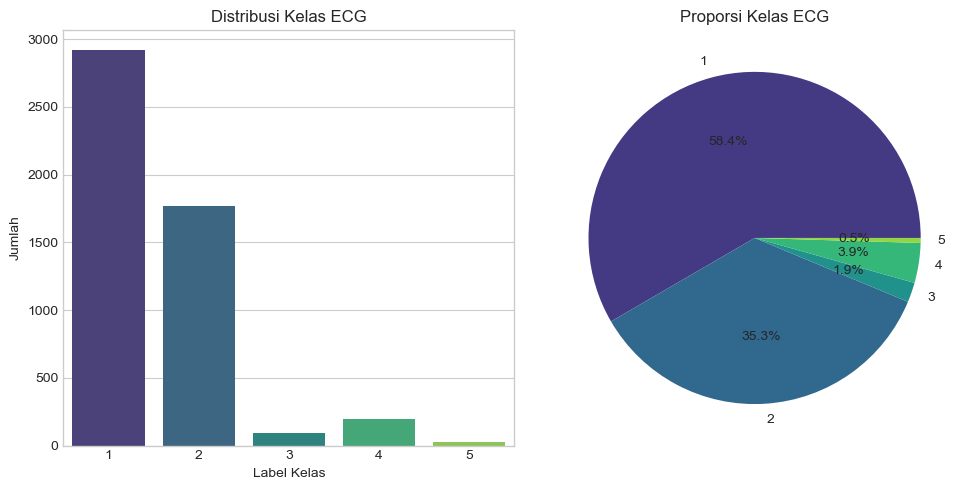

In [5]:
# Distribusi label
print('Distribusi Label:')
label_counts = pd.Series(y).value_counts().sort_index()
print(label_counts)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=y, palette='viridis')
plt.title('Distribusi Kelas ECG')
plt.xlabel('Label Kelas')
plt.ylabel('Jumlah')

plt.subplot(1, 2, 2)
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(label_counts)))
plt.title('Proporsi Kelas ECG')
plt.tight_layout()
plt.show()

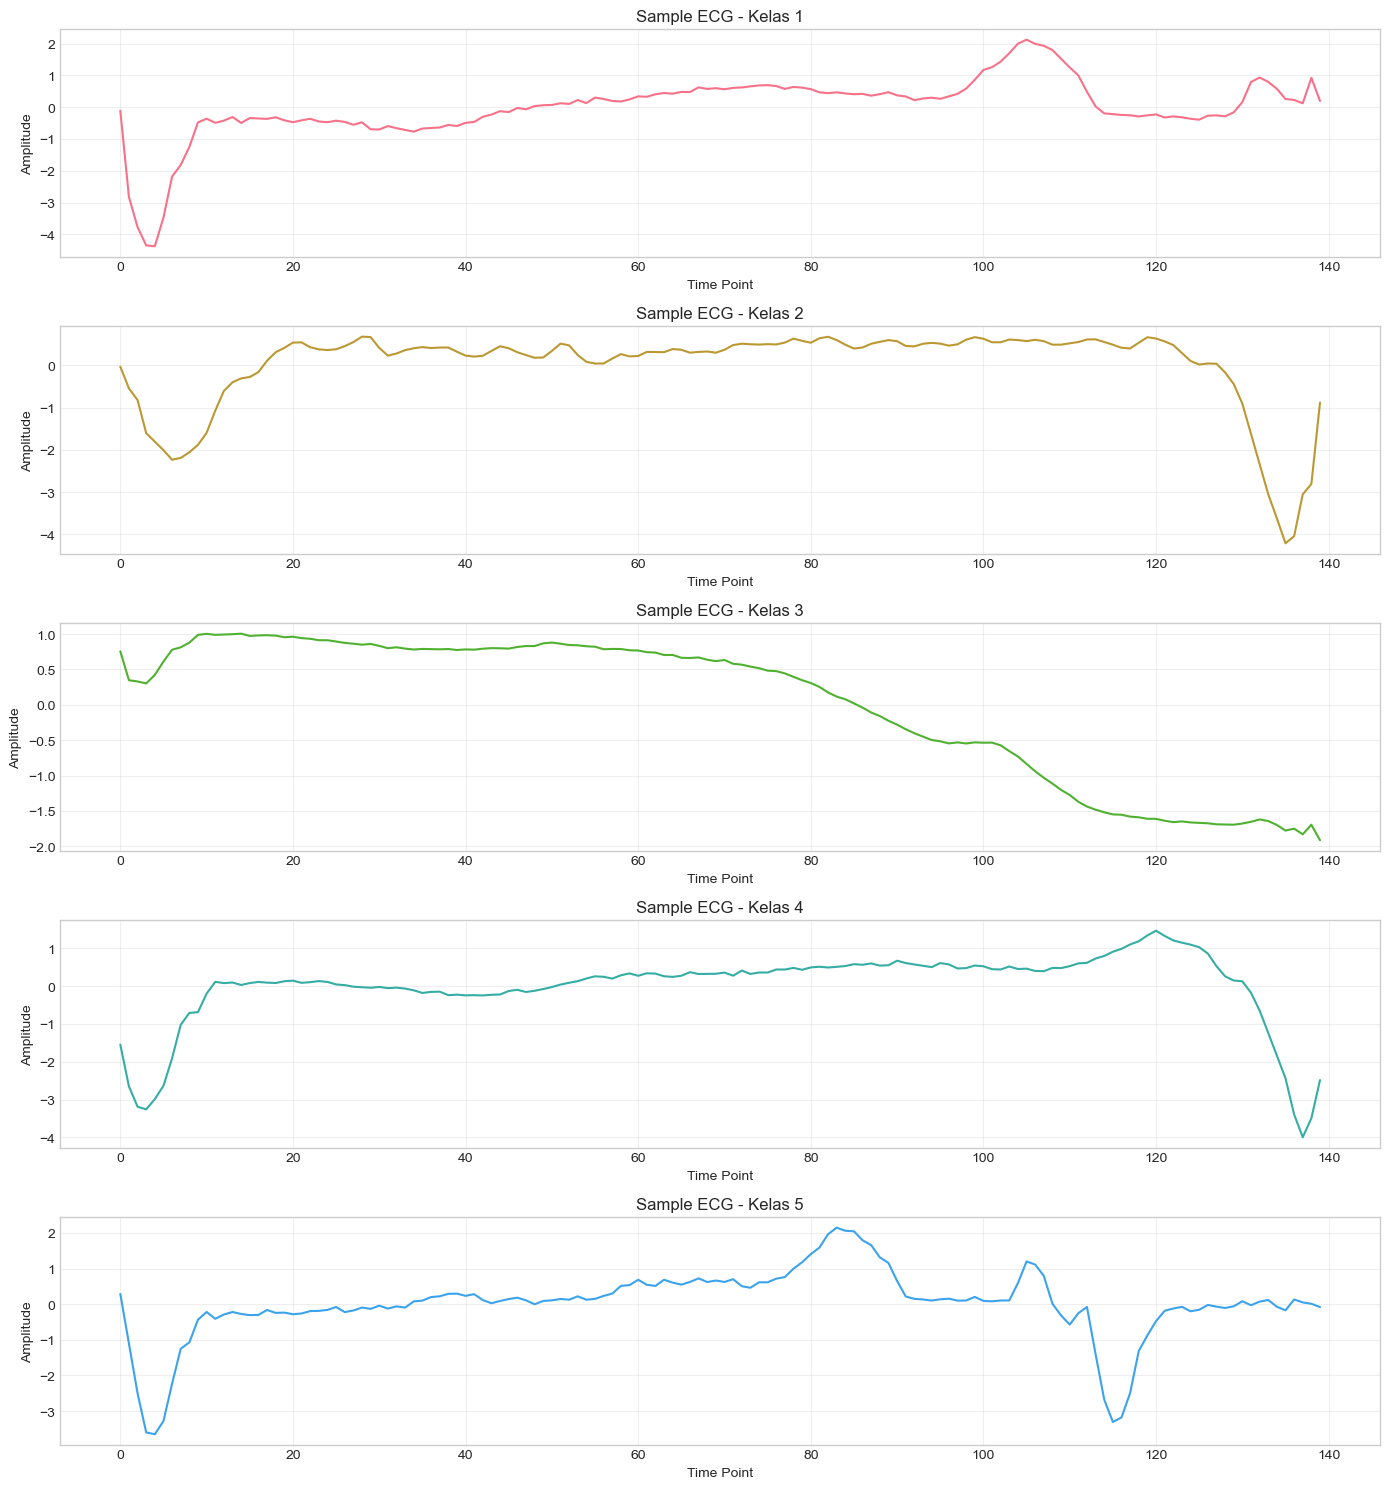

In [6]:
# Visualisasi sample sinyal ECG per kelas
unique_labels = np.unique(y)
fig, axes = plt.subplots(len(unique_labels), 1, figsize=(14, 3*len(unique_labels)))

for i, label in enumerate(unique_labels):
    idx = np.where(y == label)[0][0]
    axes[i].plot(X[idx], color=f'C{i}', linewidth=1.5)
    axes[i].set_title(f'Sample ECG - Kelas {label}')
    axes[i].set_xlabel('Time Point')
    axes[i].set_ylabel('Amplitude')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

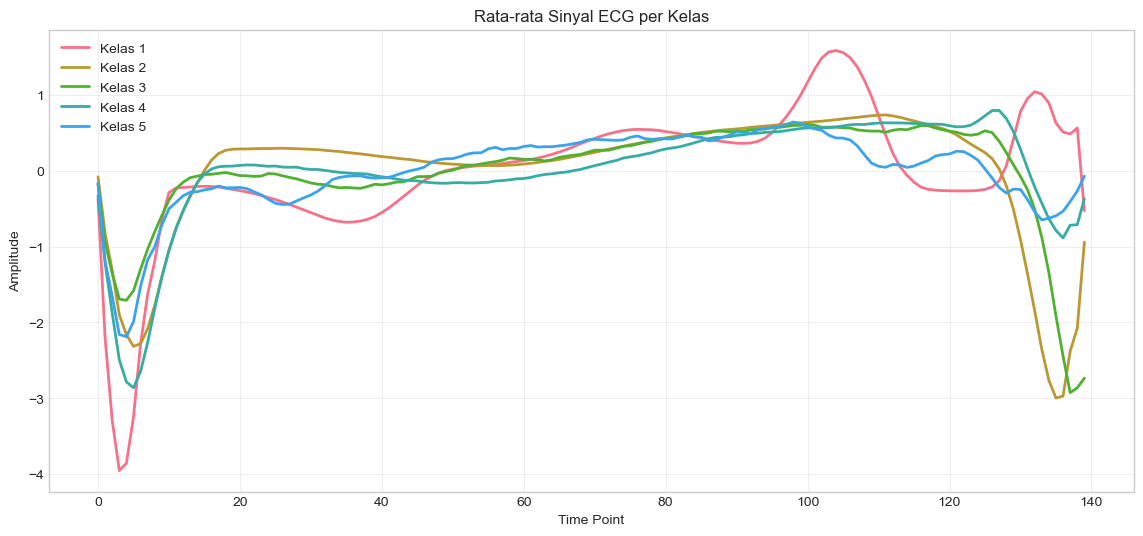

In [7]:
# Rata-rata sinyal per kelas
plt.figure(figsize=(14, 6))
for label in unique_labels:
    class_data = X[y == label]
    mean_signal = class_data.mean(axis=0)
    plt.plot(mean_signal, label=f'Kelas {label}', linewidth=2)

plt.title('Rata-rata Sinyal ECG per Kelas')
plt.xlabel('Time Point')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [8]:
# Cek missing values
print('Missing Values:')
print(f'Total missing values: {df.isnull().sum().sum()}')

# Statistik per kelas
print('\nStatistik per Kelas:')
for label in unique_labels:
    class_data = X[y == label]
    print(f'\nKelas {label}:')
    print(f'  - Jumlah sampel: {len(class_data)}')
    print(f'  - Mean amplitude: {class_data.mean():.4f}')
    print(f'  - Std amplitude: {class_data.std():.4f}')
    print(f'  - Min amplitude: {class_data.min():.4f}')
    print(f'  - Max amplitude: {class_data.max():.4f}')

Missing Values:
Total missing values: 0

Statistik per Kelas:

Kelas 1:
  - Jumlah sampel: 2919
  - Mean amplitude: -0.0000
  - Std amplitude: 0.9964
  - Min amplitude: -7.0904
  - Max amplitude: 4.9664

Kelas 2:
  - Jumlah sampel: 1767
  - Mean amplitude: -0.0000
  - Std amplitude: 0.9964
  - Min amplitude: -5.8809
  - Max amplitude: 7.4021

Kelas 3:
  - Jumlah sampel: 96
  - Mean amplitude: -0.0000
  - Std amplitude: 0.9964
  - Min amplitude: -6.0922
  - Max amplitude: 3.0759

Kelas 4:
  - Jumlah sampel: 194
  - Mean amplitude: 0.0000
  - Std amplitude: 0.9964
  - Min amplitude: -5.6395
  - Max amplitude: 2.9746

Kelas 5:
  - Jumlah sampel: 24
  - Mean amplitude: 0.0000
  - Std amplitude: 0.9964
  - Min amplitude: -4.7541
  - Max amplitude: 2.4332


---
# 3. Data Preprocessing

In [9]:
# Binary classification: Normal (1) vs Abnormal (2,3,4,5)
# Kelas 1 = Normal, Kelas lainnya = Abnormal
y_binary = (y == 1).astype(int)  # 1 = Normal, 0 = Abnormal

print('Distribusi Label Binary:')
print(f'Normal (1): {sum(y_binary == 1)}')
print(f'Abnormal (0): {sum(y_binary == 0)}')

Distribusi Label Binary:
Normal (1): 2919
Abnormal (0): 2081


In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

print(f'Training set: {X_train.shape}')
print(f'Test set: {X_test.shape}')
print(f'\nDistribusi training: Normal={sum(y_train==1)}, Abnormal={sum(y_train==0)}')
print(f'Distribusi test: Normal={sum(y_test==1)}, Abnormal={sum(y_test==0)}')

Training set: (4000, 140)
Test set: (1000, 140)

Distribusi training: Normal=2335, Abnormal=1665
Distribusi test: Normal=584, Abnormal=416


In [11]:
# Normalisasi/Standarisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Setelah Standarisasi:')
print(f'Mean: {X_train_scaled.mean():.6f}')
print(f'Std: {X_train_scaled.std():.6f}')

Setelah Standarisasi:
Mean: -0.000000
Std: 1.000000


---
# 4. Pemodelan Data

In [12]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [13]:
# Definisi model
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='rbf', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = {}

In [14]:
# Training dan evaluasi model
for name, model in models.items():
    print(f'\nTraining {name}...')
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'accuracy': acc,
        'predictions': y_pred
    }
    print(f'{name} Accuracy: {acc:.4f}')


Training Logistic Regression...
Logistic Regression Accuracy: 0.9890

Training Decision Tree...
Decision Tree Accuracy: 0.9780

Training Random Forest...
Random Forest Accuracy: 0.9920

Training KNN...
KNN Accuracy: 0.9890

Training SVM...
SVM Accuracy: 0.9930

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.9880


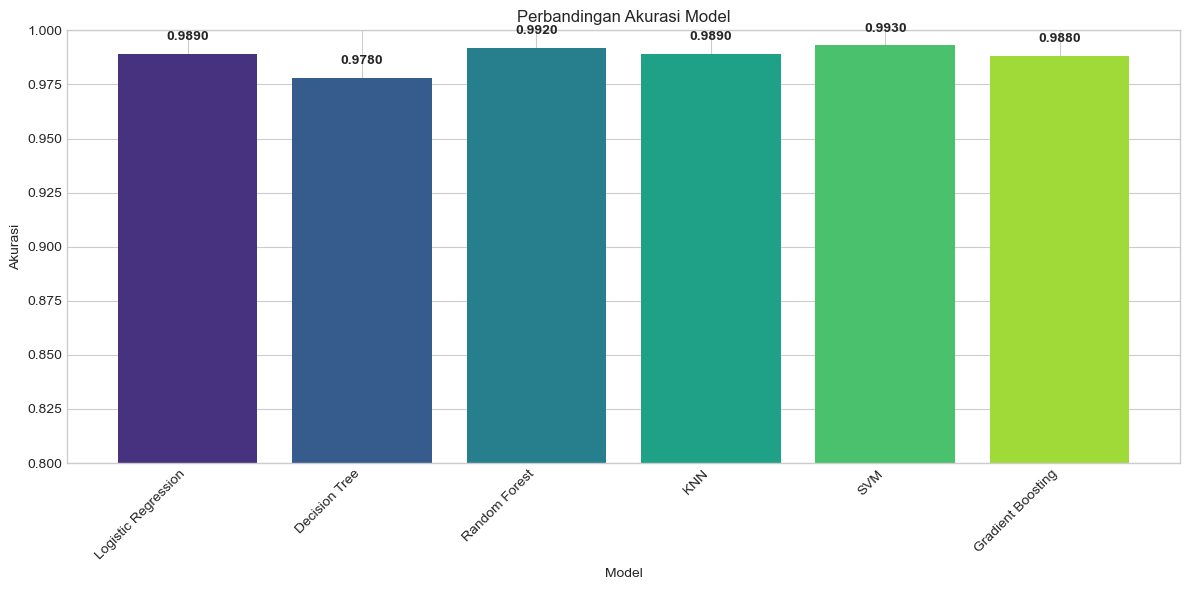

In [15]:
# Perbandingan akurasi model
accuracies = {name: results[name]['accuracy'] for name in models.keys()}
plt.figure(figsize=(12, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=sns.color_palette('viridis', len(accuracies)))
plt.title('Perbandingan Akurasi Model')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45, ha='right')

for bar, acc in zip(bars, accuracies.values()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [16]:
# Model terbaik
best_model_name = max(accuracies, key=accuracies.get)
best_model = results[best_model_name]['model']
print(f'\nModel Terbaik: {best_model_name}')
print(f'Akurasi: {accuracies[best_model_name]:.4f}')


Model Terbaik: SVM
Akurasi: 0.9930


---
# 5. Evaluasi

In [17]:
# Evaluasi model terbaik
y_pred_best = results[best_model_name]['predictions']

print(f'\n=== Evaluasi {best_model_name} ===' )
print('\nClassification Report:')
print(classification_report(y_test, y_pred_best, target_names=['Abnormal', 'Normal']))


=== Evaluasi SVM ===

Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.99      1.00      0.99       416
      Normal       1.00      0.99      0.99       584

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



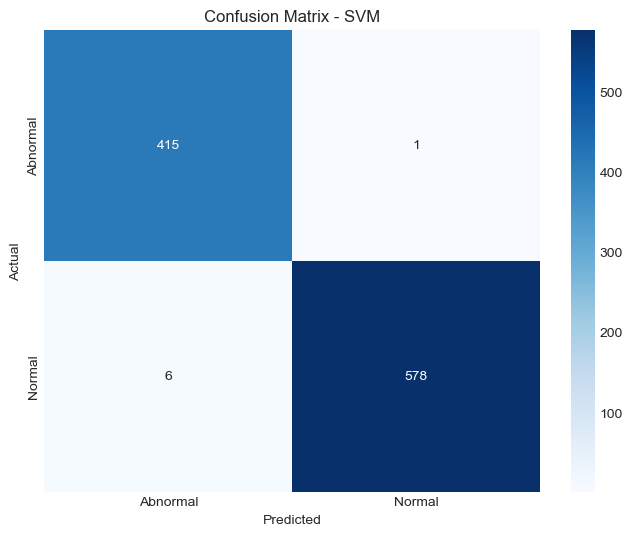

In [18]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Abnormal', 'Normal'], 
            yticklabels=['Abnormal', 'Normal'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
# Feature Importance (jika Random Forest)
if 'Random Forest' in best_model_name or best_model_name == 'Random Forest':
    rf_model = results['Random Forest']['model']
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(data=feature_importance.head(20), x='importance', y='feature', palette='viridis')
    plt.title('Top 20 Feature Importance')
    plt.xlabel('Importance')
    
    plt.subplot(1, 2, 2)
    plt.plot(feature_importance['importance'].values)
    plt.title('Feature Importance Distribution')
    plt.xlabel('Feature Index')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()

In [20]:
# Cross-validation
from sklearn.model_selection import cross_val_score

print('Cross-Validation (5-Fold):')
for name, data in results.items():
    cv_scores = cross_val_score(data['model'], X_train_scaled, y_train, cv=5)
    print(f'{name}: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})')

Cross-Validation (5-Fold):
Logistic Regression: 0.9852 (+/- 0.0073)
Decision Tree: 0.9782 (+/- 0.0068)
Random Forest: 0.9918 (+/- 0.0034)
KNN: 0.9870 (+/- 0.0060)
SVM: 0.9905 (+/- 0.0058)
Gradient Boosting: 0.9915 (+/- 0.0048)


---
# 6. Deployment

Model akan di-deploy menggunakan Streamlit.

In [21]:
# Save model dan scaler
import joblib

joblib.dump(best_model, 'ecg_model.pkl')
joblib.dump(scaler, 'ecg_scaler.pkl')
print('Model dan scaler berhasil disimpan!')

Model dan scaler berhasil disimpan!


---
# Kesimpulan

## Ringkasan Proyek:
1. **Business Understanding**: Tujuan proyek adalah mengklasifikasikan sinyal ECG untuk deteksi anomali jantung
2. **Data Understanding**: Dataset ECG5000 memiliki 5000 sampel dengan 140 fitur time series
3. **Preprocessing**: Data dinormalisasi dan dibagi menjadi klasifikasi binary (Normal vs Abnormal)
4. **Modeling**: Beberapa model ML diuji coba
5. **Evaluation**: Model terbaik dipilih berdasarkan akurasi dan metrics lainnya
6. **Deployment**: Model di-deploy menggunakan Streamlit
